In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 1.7 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/11.1 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.1 MB 2.2 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.1 MB 2.2 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.1 MB 2.3 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 2.3 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.1 MB 2.3 MB/s eta 0:00:04
   ---------------- ----------------------- 4.5/11.1 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 4.7/11.1 MB 2.3 MB/s eta 0:00:03
   ------------

Model Training

In [5]:
pip install catboost


   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.5 MB 2.0 MB/s eta 0:00:52
    --------------------------------------- 1.3/102.5 MB 2.1 MB/s eta 0:00:49
    --------------------------------------- 1.8/102.5 MB 2.2 MB/s eta 0:00:47
    --------------------------------------- 2.1/102.5 MB 2.1 MB/s eta 0:00:48
   - -------------------------------------- 2.6/102.5 MB 2.2 MB/s eta 0:00:45
   - -------------------------------------- 3.1/102.5 MB 2.3 MB/s eta 0:00:45
   - -------------------------------------- 3.7/102.5 MB 2.1 MB/s eta 0:00:47
   - -------------------------------------- 3.9/102.5 MB 2.2 MB/s eta 0:00:46
   - -------------------------------------- 4.2/102.5 MB 2.0 MB/s eta 0:00:50
   - -------------------------------------- 4.7/102.5 MB 2.0 MB/s eta 0:00:50
   - -------------------------------------- 4.7/102.5 MB 2.0 MB/s eta 0:00:50

In [9]:
pip install xgboost


  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.1 MB/s eta 0:01:12
   ---------------------------------------- 0.8/150.0 MB 2.2 MB/s eta 0:01:07
   ---------------------------------------- 1.3/150.0 MB 2.1 MB/s eta 0:01:11
   ---------------------------------------- 1.8/150.0 MB 2.1 MB/s eta 0:01:11
    --------------------------------------- 2.4/150.0 MB 2.1 MB/s eta 0:01:10
    --------------------------------------- 2.6/150.0 MB 2.1 MB/s eta 0:01:10
    --------------------------------------- 2.9/150.0 MB 1.9 MB/s eta 0:01:17
    --------------------------------------- 3.4/150.0 MB 2.0 MB/s eta 0:01:13
   - -------------------------------------- 3.9/150.0 MB 2.0 MB/s eta 0:01:13
   - -------------------------------------- 4.5/150.0 MB 2.0 MB/s eta 0:01:12
   - --

In [3]:
#Basic Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

import the CSV as pandas Dataframe

In [4]:
df = pd.read_csv('data/stud.csv')

In [13]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variable

In [5]:
X = df.drop(columns=['math_score'],axis=1)

In [6]:
y = df['math_score']

In [7]:
#Create column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
            ("OneHotEncoder", oh_transformer,cat_features),
            ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
#separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((750, 19), (250, 19))

Create an Evaluate Function to give all metrics after model training


In [10]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_sc = r2_score(true,predicted)
    return mae,rmse,r2_sc


In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neihbours Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}


model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)  # Train model
    

    # make Prediction

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


# Evaluate Train and Test dataset

    model_train_mae, model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)



    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error:{:.4f}".format(model_train_mae))
    print(" R2 Score:{:.4f}".format(model_train_r2))

    print('----------------------------------------------------------------------')


    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error:{:.4f}".format(model_test_mae))
    print("R2 Score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2972
- Mean Absolute Error:4.2383
 R2 Score:0.8743
----------------------------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4825
- Mean Absolute Error:4.3379
R2 Score:0.8778


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5515
- Mean Absolute Error:5.1837
 R2 Score:0.8077
----------------------------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6541
- Mean Absolute Error:5.2217
R2 Score:0.8200


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2976
- Mean Absolute Error:4.2368
 R2 Score:0.8743
----------------------------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4788
- Mean Absolute Error:4.3354
R2 Score:0.8780


K-Neihbours Regressor
Model performance for Training set
- Root Mean Squared

Result

In [12]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.877990
0,Linear Regression,0.877824
6,CatBoosting Regressor,0.854830
7,AdaBoost Regressor,0.841224
5,XGBRegressor,0.836290
1,Lasso,0.820027
3,K-Neihbours Regressor,0.793248
4,Decision Tree,0.751081


Linear Regression

In [14]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)



Accuracy of the model is 87.78


plot y_pred and y_test

Text(0, 0.5, 'Predicted')

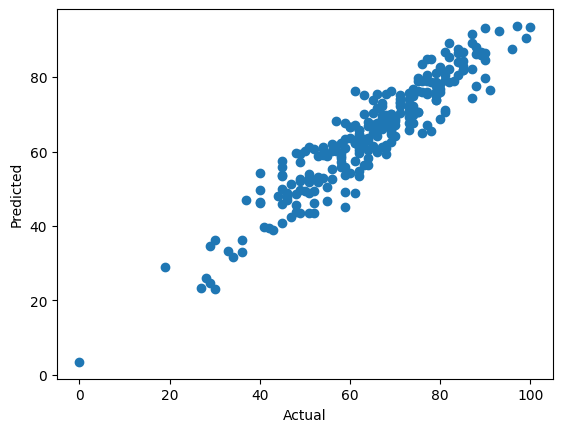

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

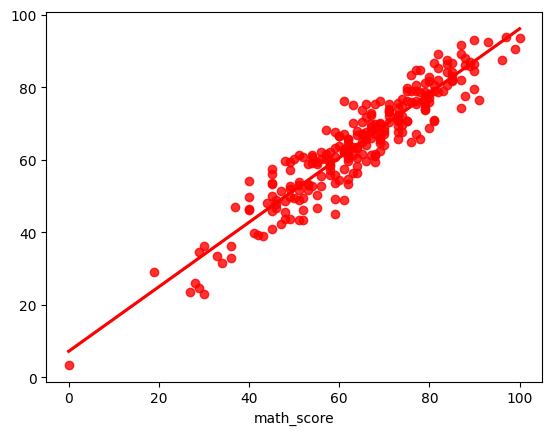

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

Difference between Actual and Predicted Values

In [19]:
pred_diff = pd.DataFrame({'Actal Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_diff

,Actal Value,Predicted Value,Difference
521,91,76.415556,14.584444
737,53,58.835356,-5.835356
740,80,76.907370,3.092630
660,74,76.760032,-2.760032
411,84,87.454007,-3.454007
...,...,...,...
109,70,64.035129,5.964871
430,64,63.158496,0.841504
77,80,82.733853,-2.733853
84,42,39.387374,2.612626
